In [2]:
import numpy as np
import astropy as ap
import matplotlib.pyplot as plt

[ 0.          1.41388891  3.29444449  5.24305562  8.1326389  10.82013894
 14.71666668 19.75625008 25.13125005 32.38750009 40.44930566]


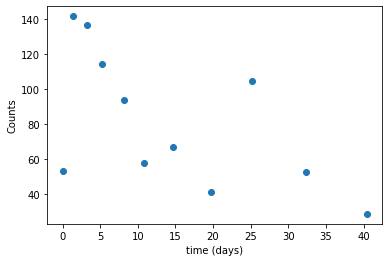

In [3]:
data = np.loadtxt('Snapshots.txt',skiprows=1)

sum_lil,npix_lil,sum_big,npix_big,time = data[:,0],data[:,1],data[:,2],data[:,3],data[:,4] # Data

new_time = time - time[0]
new_time = new_time[0:-1]
print(new_time)

star = ((sum_lil/npix_lil)-(sum_big/npix_big))*npix_lil # Background flux subtracted from the star flux
new_star = star[0:-1] # removing the final term because it has too big a time gap

#22.57 = -2.5*np.log10(F) + c
#c = 22.57 + 2.5*np.log10(F) # Calculating c for 1000 counts which gives us 22.57 apparent magnitude
#m = -2.5*np.log10(F)+c # Apparent magnitude equation with constant c, F = counts
#m
#print(star)


plt.scatter(new_time,new_star)
#plt.scatter(time,np.log10(star))
plt.ylabel('Counts')
plt.xlabel('time (days)')
plt.show()

[25.75422194 24.69367407 24.73109808 24.92878924 25.13956757 25.67158952
 25.51258681 26.03701574 25.02372458 25.77408847 26.4335969 ]
-4.781502889463474
11358223.876685923
11.358223876685923


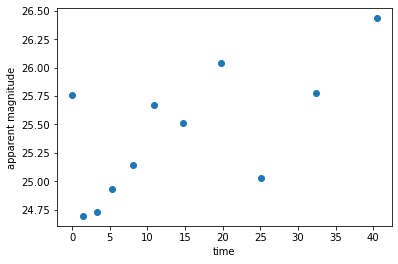

In [7]:
# Pipeline

#Plot counts vs time (with background removed)
#Find the period of the cepheid
#Hubble SpaceTelescope Fine Guidance Sensor Parallaxes of Galactic Cepheid Variable Stars:  Period-Luminosity Relations
#Use above paper for PLR
#Use M =a+b*(logP-1) where a and b values correspond to filter "V", a=-4.05±0.02, b=-2.43±0.12
# m - M = 5log(d/10)
# d=10*10^(m-M/5)

c = 22.57 + 2.5*np.log10(1000) # constant c is for 1000 counts which gives apparent magnitude 22.57
m = -2.5*np.log10(new_star)+c # Apparent magnitude equation with constant c
print(m)

plt.scatter(new_time,m)
plt.xlabel('time')
plt.ylabel('apparent magnitude')

P = 20 # approx period in days

M = -4.05 - 2.43*(np.log10(P)-1)
print(M)

# m - M = 5log(d/10)
d = 10*10**((m-M)/5) # Rearranged for d (in pc)
d = np.mean(d) # Mean


print(d) # In pc
print(d/1e6) # In MPc